#### Importar librerías

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Generar datos

In [39]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('IF_intro', inputs=generated_inputs, targets=generated_targets)

#### Resolviendo con tensorFlow

In [40]:
training_data = np.load("IF_intro.npz")

In [41]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(
            output_size, 
            kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
            bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
        ),
])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 74.3042 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 1.5792
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.4459
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.4179
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.3900
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.3877
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.3710
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.4163
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.3932
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4032  
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.4863
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.4987
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3852 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.3795
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

#### Extrayendo el weights y biases 

In [42]:
model.layers[0].get_weights()

[array([[ 2.0416965],
        [-3.0173218]], dtype=float32),
 array([4.982137], dtype=float32)]

In [43]:
weights = model.layers[0].get_weights()[0]
print(weights)

[[ 2.0416965]
 [-3.0173218]]


In [44]:
bias = model.layers[0].get_weights()[1]
print(bias)

[4.982137]


#### Extrayendo los outputs

In [45]:
model.predict_on_batch(training_data['inputs'])

array([[-2.52310753e+01],
       [ 1.82909737e+01],
       [ 2.22791080e+01],
       [ 2.09587631e+01],
       [ 1.84132910e+00],
       [-2.23797550e+01],
       [ 1.65388336e+01],
       [ 1.77792511e+01],
       [-5.24234247e+00],
       [ 4.20350189e+01],
       [-3.27064972e+01],
       [ 4.05156212e+01],
       [-8.00890446e-01],
       [ 4.86069374e+01],
       [ 2.94900608e+01],
       [ 1.66692104e+01],
       [-1.87084637e+01],
       [-2.02249193e+00],
       [ 1.02817669e+01],
       [-2.93540211e+01],
       [ 6.93595076e+00],
       [-4.08678389e+00],
       [-6.01699781e+00],
       [ 4.23441620e+01],
       [ 3.69316483e+01],
       [-2.87071552e+01],
       [-1.59101963e-01],
       [ 3.18921070e+01],
       [ 7.38312101e+00],
       [-1.34442234e+01],
       [ 1.06657772e+01],
       [ 1.67357254e+01],
       [ 2.17875252e+01],
       [ 2.27665291e+01],
       [ 2.21918964e+01],
       [-3.31219053e+00],
       [-4.86748648e+00],
       [-7.10508490e+00],
       [ 3.4

In [46]:
training_data['targets'].round(1)

array([[-24.9],
       [ 18.9],
       [ 21.9],
       [ 20.7],
       [  1.1],
       [-22. ],
       [ 16.8],
       [ 17. ],
       [ -5.9],
       [ 42.5],
       [-32.7],
       [ 40.8],
       [ -0.2],
       [ 47.8],
       [ 29.5],
       [ 15.7],
       [-18.6],
       [ -2. ],
       [  9.4],
       [-29.5],
       [  6.8],
       [ -3.5],
       [ -5.5],
       [ 42.6],
       [ 37.1],
       [-28.6],
       [ -0.4],
       [ 30.9],
       [  7.6],
       [-14.1],
       [  9.8],
       [ 15.9],
       [ 22.8],
       [ 23.5],
       [ 23.1],
       [ -3.9],
       [ -5. ],
       [ -6.6],
       [  2.7],
       [ -7.1],
       [ 37.7],
       [ 10.9],
       [-10.2],
       [ 27.9],
       [  7.1],
       [ 22.9],
       [-31. ],
       [ 49.8],
       [  7. ],
       [ 18. ],
       [-20.4],
       [ 11.8],
       [ -4.3],
       [ 26. ],
       [  4.9],
       [-40.7],
       [ 27.5],
       [ -1.8],
       [-20.4],
       [ -2.8],
       [ 20.4],
       [ -5.6],
       [

#### Mostrando los datos

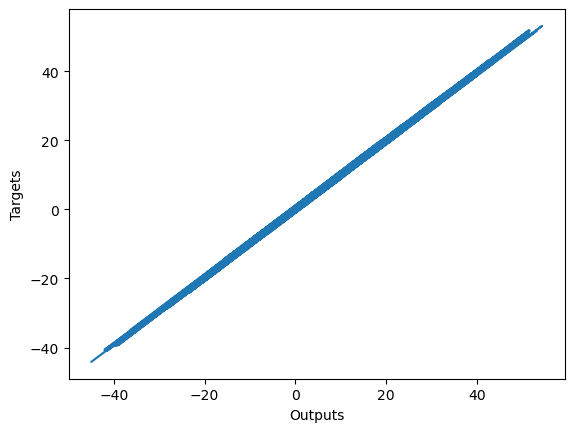

In [47]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()